In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean, stdev

# data partition
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# metric
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# oversampling
from imblearn.over_sampling import RandomOverSampler

# Kfold
from sklearn.model_selection import StratifiedKFold

# scale
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

## Preprocessing

In [2]:
# open the dataset
df = pd.read_csv('data/train.csv')
df.head(3)

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
0,102863333,21-Mar-20,0,0.0,0,0.0,3,64.0,0.0000,0.0667,0.0,MacOSX,2,Portugal,1,Returner,0
1,103117814,20-May-20,0,0.0,0,0.0,23,684.5,0.0217,0.0449,0.0,Windows,2,France,6,Returner,0
2,103201891,4-Dec-20,0,0.0,0,0.0,8,95.0,0.0250,0.0583,0.0,Windows,4,Italy,1,Returner,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Access_ID                   9999 non-null   int64  
 1   Date                        9999 non-null   object 
 2   AccountMng_Pages            9999 non-null   int64  
 3   AccountMng_Duration         9999 non-null   float64
 4   FAQ_Pages                   9999 non-null   int64  
 5   FAQ_Duration                9999 non-null   float64
 6   Product_Pages               9999 non-null   int64  
 7   Product_Duration            9999 non-null   float64
 8   GoogleAnalytics_BounceRate  9999 non-null   float64
 9   GoogleAnalytics_ExitRate    9999 non-null   float64
 10  GoogleAnalytics_PageValue   9999 non-null   float64
 11  OS                          9999 non-null   object 
 12  Browser                     9999 non-null   int64  
 13  Country                     9999 

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Access_ID,9999.0,4.519728e+08,2.024990e+08,102863333.0,2.731950e+08,4.536169e+08,6.259756e+08,7.984440e+08
AccountMng_Pages,9999.0,2.324232e+00,3.340676e+00,0.0,0.000000e+00,1.000000e+00,4.000000e+00,2.700000e+01
AccountMng_Duration,9999.0,8.120585e+01,1.797155e+02,0.0,0.000000e+00,7.500000e+00,9.220835e+01,3.398750e+03
FAQ_Pages,9999.0,5.080508e-01,1.279390e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01
FAQ_Duration,9999.0,3.455910e+01,1.397970e+02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.549375e+03
Product_Pages,9999.0,3.168587e+01,4.455028e+01,0.0,7.000000e+00,1.800000e+01,3.800000e+01,7.050000e+02
Product_Duration,9999.0,1.199769e+03,1.958276e+03,0.0,1.835625e+02,5.990000e+02,1.470271e+03,6.397352e+04
GoogleAnalytics_BounceRate,9999.0,2.230545e-02,4.877597e-02,0.0,0.000000e+00,3.200000e-03,1.680000e-02,2.000000e-01
GoogleAnalytics_ExitRate,9999.0,4.318147e-02,4.884528e-02,0.0,1.430000e-02,2.510000e-02,5.000000e-02,2.000000e-01
GoogleAnalytics_PageValue,9999.0,5.963120e+00,1.875363e+01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,3.617637e+02


In [5]:
# data types transformation
# Converting Date type from object to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

## unbalenced data

In [6]:
df['Buy'].value_counts()

0    8447
1    1552
Name: Buy, dtype: int64

## New features

In [7]:
# type of OS: mobile or computer
df['OS'].unique()

array(['MacOSX', 'Windows', 'Android', 'Ubuntu', 'iOS', 'Other', 'Fedora',
       'Chrome OS'], dtype=object)

In [8]:
# 0 - PC/ 1 - Mobile
dict_os = {'MacOSX': 0, 'Windows': 0, 'Android': 1, 'Ubuntu': 0, 'iOS': 1, 'Other': 0, 'Fedora': 0, 'Chrome OS':0}
df['OS_type'] = df['OS'].map(dict_os)

In [9]:
# Type of Visitor
df['Type_of_Visitor'].value_counts()

Returner      8534
New_Access    1391
Other           74
Name: Type_of_Visitor, dtype: int64

In [10]:
# 0 - Returner/ 1 - New_Access/ 2 - Other
dict_visitor = {'Returner': 0, 'New_Access': 1, 'Other': 2}

df['Type_of_Visitor_type'] = df['Type_of_Visitor'].map(dict_visitor)

## Remove Outliers

In [11]:
# trashold for outliers
filters1 = (
    (df['AccountMng_Duration']<=2000)
    &
    (df['FAQ_Duration']<=1500)
    &
    (df['Product_Pages']<=500)
    &
    (df['Product_Duration']<=25000)
    &
    (df['GoogleAnalytics_PageValue']<=300)
)

df_1 = df[filters1]

print('Percentage of data kept after removing outliers:', np.round(df_1.shape[0] / df.shape[0], 4))

df = df[filters1]

Percentage of data kept after removing outliers: 0.9973


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Access_ID,9972.0,4.521602e+08,2.025858e+08,102863333.0,2.733227e+08,4.539848e+08,6.263382e+08,7.984440e+08
AccountMng_Pages,9972.0,2.306558e+00,3.308251e+00,0.0,0.000000e+00,1.000000e+00,4.000000e+00,2.600000e+01
AccountMng_Duration,9972.0,7.918739e+01,1.671393e+02,0.0,0.000000e+00,7.000000e+00,9.175000e+01,1.951279e+03
FAQ_Pages,9972.0,4.972924e-01,1.237795e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01
FAQ_Duration,9972.0,3.133000e+01,1.174612e+02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.494500e+03
Product_Pages,9972.0,3.110961e+01,4.141405e+01,0.0,7.000000e+00,1.800000e+01,3.800000e+01,4.700000e+02
Product_Duration,9972.0,1.166473e+03,1.682319e+03,0.0,1.825625e+02,5.972917e+02,1.460652e+03,2.388881e+04
GoogleAnalytics_BounceRate,9972.0,2.235188e-02,4.883266e-02,0.0,0.000000e+00,3.200000e-03,1.690000e-02,2.000000e-01
GoogleAnalytics_ExitRate,9972.0,4.324573e-02,4.889256e-02,0.0,1.430000e-02,2.520000e-02,5.000000e-02,2.000000e-01
GoogleAnalytics_PageValue,9972.0,5.894852e+00,1.808925e+01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.879538e+02


## Correlation

In [13]:
df.columns

Index(['Access_ID', 'Date', 'AccountMng_Pages', 'AccountMng_Duration',
       'FAQ_Pages', 'FAQ_Duration', 'Product_Pages', 'Product_Duration',
       'GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate',
       'GoogleAnalytics_PageValue', 'OS', 'Browser', 'Country',
       'Type_of_Traffic', 'Type_of_Visitor', 'Buy', 'OS_type',
       'Type_of_Visitor_type'],
      dtype='object')

In [14]:
# Define metric and non-metric features
non_metric_features = ['Access_ID', 'Date', 'OS', 'Browser', 'Country','Type_of_Traffic', 'Type_of_Visitor',
                       'Buy', 'OS_type', 'Type_of_Visitor_type']
metric_features = df.columns.drop(non_metric_features).to_list()

In [15]:
def cor_heatmap(cor, ax):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1', ax=ax)
    plt.show()

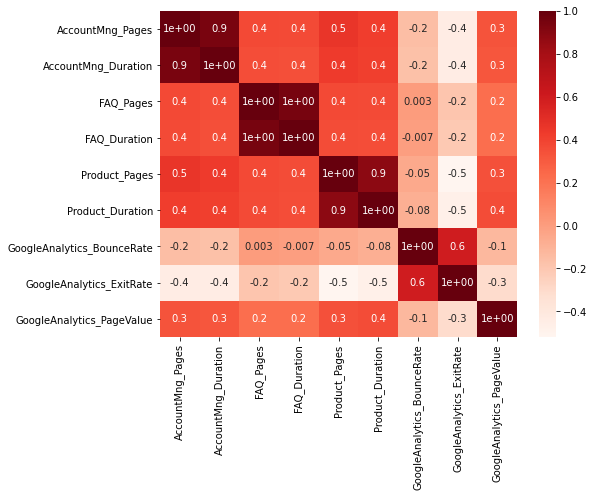

<Figure size 864x720 with 0 Axes>

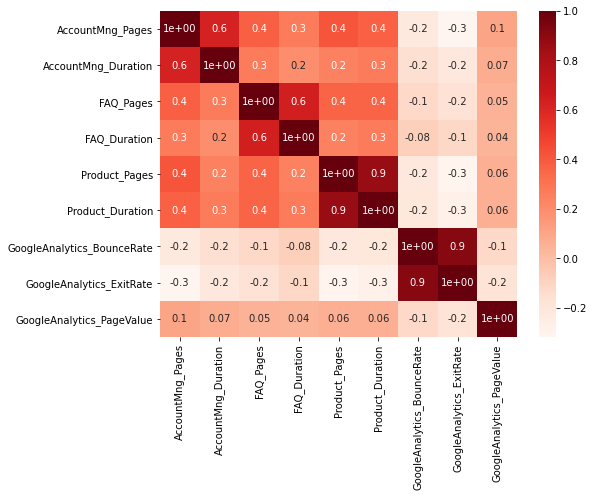

<Figure size 864x720 with 0 Axes>

In [16]:
#build correlation matrix
cor_spearman = df[metric_features].corr(method ='spearman')
# cor_spearman

cor_pearson = df[metric_features].corr(method='pearson')

fig, ax1 = plt.subplots(1,1, figsize=(8,6))
cor_heatmap(cor_spearman, ax1)
fig, ax1 = plt.subplots(1,1, figsize=(8,6))
cor_heatmap(cor_pearson, ax1)

In [17]:
# drop 'AccountMng_Pages' 'FAQ Duration' 'Product Duration' 'GoogleAnalytics_BounceRate'
df.drop(['AccountMng_Pages','FAQ_Duration','Product_Duration', 'GoogleAnalytics_BounceRate'], axis=1, inplace=True)

## Dataset for DecisionTree Reg1

In [18]:
df.columns

Index(['Access_ID', 'Date', 'AccountMng_Duration', 'FAQ_Pages',
       'Product_Pages', 'GoogleAnalytics_ExitRate',
       'GoogleAnalytics_PageValue', 'OS', 'Browser', 'Country',
       'Type_of_Traffic', 'Type_of_Visitor', 'Buy', 'OS_type',
       'Type_of_Visitor_type'],
      dtype='object')

In [19]:
df_log1 = df[['AccountMng_Duration', 'FAQ_Pages', 'Product_Pages', 'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue',
              'Type_of_Traffic', 'Buy', 'OS_type', 'Type_of_Visitor_type']]

In [20]:
X = df_log1.drop('Buy', axis=1)
y = df_log1['Buy']

In [21]:
X

,AccountMng_Duration,FAQ_Pages,Product_Pages,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Type_of_Traffic,OS_type,Type_of_Visitor_type
0,0.0,0,3,0.0667,0.0000,1,0,0
1,0.0,0,23,0.0449,0.0000,6,0,0
2,0.0,0,8,0.0583,0.0000,1,0,0
3,0.0,0,9,0.0250,42.4225,2,0,0
4,0.0,2,36,0.0093,12.5033,3,0,0
...,...,...,...,...,...,...,...,...
9994,159.0,2,23,0.0111,0.0000,14,0,0
9995,175.1,0,3,0.0111,0.0000,5,0,1
9996,0.0,0,27,0.0519,0.0000,3,0,0
9997,0.0,0,53,0.0363,0.0000,3,0,0


## Balance the y - test Oversampling

In [22]:
# Before Oversampling
print('X:', X.shape)
print('y:', y.shape)
y.value_counts()

X: (9972, 8)
y: (9972,)


0    8429
1    1543
Name: Buy, dtype: int64

In [23]:
ros = RandomOverSampler(random_state=0)
X_over, y_over = ros.fit_resample(X, y)

In [24]:
# After Oversampling
print('X_over:', X_over.shape)
print('y_over:', y_over.shape)
y_over.value_counts()

X_over: (16858, 8)
y_over: (16858,)


0    8429
1    8429
Name: Buy, dtype: int64

## Scale - MaxMin

In [40]:
# split the dataset
X_train, X_val, y_train, y_val = train_test_split(X_over, y_over, test_size=0.2, random_state=5, stratify=y_over)

In [38]:
def calculate_F1(interval, parameter, max_depth = None):
    skf = StratifiedKFold(n_splits=10)
    train_results = []
    avg_train_results = []
    test_results = []
    avg_test_results = []
    
    for value in interval:
        for train_index, test_index in skf.split(X_over,y_over):
            X_train, X_test = X_over.iloc[train_index], X_over.iloc[test_index]
            y_train, y_test = y_over.iloc[train_index], y_over.iloc[test_index]
            dt = DecisionTreeClassifier(max_depth = value)
            dt.fit(X_train, y_train)
            train_pred = dt.predict(X_train)
            f1_train = f1_score(y_train, train_pred)
            train_results.append(f1_train)
            val_pred = dt.predict(X_test)
            f1_val = f1_score(y_test, val_pred)
            test_results.append(f1_val)
        avg_train_results.append(round(np.mean(train_results),3))
        avg_test_results.append(round(np.mean(test_results),3))
    
    print('The best f1 score for train is ' + str(max(avg_train_results)) + ' for the depth of ' + str(avg_train_results.index(max(avg_train_results))+1))
    print('The best f1 score for test is ' + str(max(avg_test_results)) + ' for the depth of ' + str(avg_test_results.index(max(avg_test_results))+1))
        
    
    plt.plot(interval, avg_train_results, label = "Train F1")
    plt.plot(interval, avg_test_results, label = "Test F1")
    plt.xticks(interval)
    plt.legend()
    plt.ylabel("F1 score")
    plt.xlabel(str(parameter))
    plt.show()

The best f1 score for train is 0.907 for the depth of 19
The best f1 score for test is 0.888 for the depth of 19


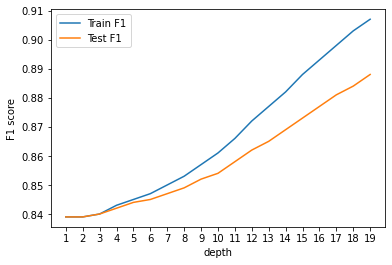

In [60]:
calculate_F1(np.arange(1,20), 'depth')

In [42]:
model_dt = DecisionTreeClassifier(max_depth = 9).fit(X_train, y_train)

y_pred_train = model_dt.predict(X_train)
y_pred_val = model_dt.predict(X_val)

In [43]:
# evaluation:
print('confusion matrix')
print(confusion_matrix(y_val, y_pred_val))

print('accuracy:', accuracy_score(y_val, y_pred_val))
print('precision:', precision_score(y_val, y_pred_val))
print('recall:', recall_score(y_val, y_pred_val))
print('f1_train:', f1_score(y_train, y_pred_train))
print('f1_val:', f1_score(y_val, y_pred_val))

confusion matrix
[[1474  212]
 [ 247 1439]]
accuracy: 0.8638790035587188
precision: 0.8715929739551787
recall: 0.8534994068801898
f1_train: 0.8804274211754082
f1_val: 0.8624513035660774


## Feature importance DT

In [62]:
gini_importance = DecisionTreeClassifier().fit(X_train, y_train).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train).feature_importances_

<AxesSubplot:xlabel='Value', ylabel='Col'>

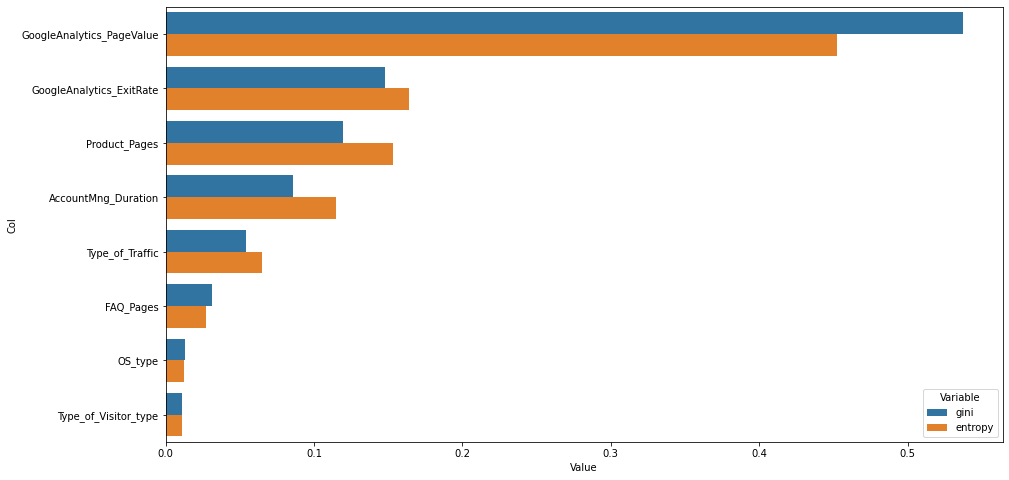

In [63]:
zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

## Dataset for test

In [44]:
test_set = pd.read_csv('data/test.csv')
# test_set.set_index('Access_ID', inplace = True)

In [45]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Access_ID                   2300 non-null   int64  
 1   Date                        2300 non-null   object 
 2   AccountMng_Pages            2300 non-null   int64  
 3   AccountMng_Duration         2300 non-null   float64
 4   FAQ_Pages                   2300 non-null   int64  
 5   FAQ_Duration                2300 non-null   float64
 6   Product_Pages               2300 non-null   int64  
 7   Product_Duration            2300 non-null   float64
 8   GoogleAnalytics_BounceRate  2300 non-null   float64
 9   GoogleAnalytics_ExitRate    2300 non-null   float64
 10  GoogleAnalytics_PageValue   2300 non-null   float64
 11  OS                          2300 non-null   object 
 12  Browser                     2300 non-null   int64  
 13  Country                     2300 

In [46]:
test_set.head()

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor
0,798519314,24-Aug-20,0,0.00,0,0.0,86,5332.5478,0.0139,0.0654,0.0000,Windows,2,Brazil,1,Returner
1,798663101,25-May-20,2,37.50,0,0.0,55,1420.4725,0.0012,0.0058,0.0000,Android,1,Spain,4,Returner
2,798663221,2-Nov-20,0,0.00,0,0.0,36,788.5000,0.0000,0.0250,0.0000,Windows,6,Spain,3,Returner
3,798760918,14-May-20,0,0.00,0,0.0,2,689.0000,0.0000,0.1000,0.0000,Windows,2,Spain,2,New_Access
4,798856982,5-Nov-20,12,225.25,1,0.0,129,3367.0413,0.0014,0.0185,1.0353,Windows,4,Portugal,10,Returner


In [47]:
test_set.describe().T

,count,mean,std,min,25%,50%,75%,max
Access_ID,2300.0,8.804779e+08,4.702750e+07,798519314.0,8.401491e+08,8.804244e+08,9.208468e+08,9.622187e+08
AccountMng_Pages,2300.0,2.290000e+00,3.252300e+00,0.0,0.000000e+00,1.000000e+00,4.000000e+00,2.300000e+01
AccountMng_Duration,2300.0,7.978093e+01,1.644476e+02,0.0,0.000000e+00,8.550000e+00,9.785000e+01,2.720500e+03
FAQ_Pages,2300.0,4.865217e-01,1.234311e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
FAQ_Duration,2300.0,3.426683e+01,1.455007e+02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.252033e+03
Product_Pages,2300.0,3.192870e+01,4.415023e+01,0.0,8.000000e+00,1.800000e+01,3.800000e+01,5.340000e+02
Product_Duration,2300.0,1.172039e+03,1.702731e+03,0.0,1.868750e+02,5.986893e+02,1.439535e+03,1.850413e+04
GoogleAnalytics_BounceRate,2300.0,2.170235e-02,4.721379e-02,0.0,0.000000e+00,2.900000e-03,1.675000e-02,2.000000e-01
GoogleAnalytics_ExitRate,2300.0,4.256478e-02,4.753867e-02,0.0,1.427500e-02,2.520000e-02,5.000000e-02,2.000000e-01
GoogleAnalytics_PageValue,2300.0,5.588465e+00,1.778171e+01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.585499e+02


In [48]:
test_set['Type_of_Visitor'].unique()
test_set['OS'].unique()

array(['Windows', 'Android', 'MacOSX', 'iOS', 'Fedora', 'Chrome OS',
       'Other', 'Ubuntu'], dtype=object)

In [49]:
# select the columns for the model

# 0 - PC/ 1 - Mobile
dict_os = {'MacOSX': 0, 'Windows': 0, 'Android': 1, 'Ubuntu': 0, 'iOS': 1, 'Other': 0, 'Fedora': 0, 'Chrome OS':0}
test_set['OS_type'] = test_set['OS'].map(dict_os)

# 0 - Returner/ 1 - New_Access/ 2 - Other
dict_visitor = {'Returner': 0, 'New_Access': 1, 'Other': 2}
test_set['Type_of_Visitor_type'] = test_set['Type_of_Visitor'].map(dict_visitor)

test = test_set[['AccountMng_Duration', 'FAQ_Pages', 'Product_Pages', 'GoogleAnalytics_ExitRate',
                 'GoogleAnalytics_PageValue', 'Type_of_Traffic', 'OS_type', 'Type_of_Visitor_type']]

In [50]:
test.columns

Index(['AccountMng_Duration', 'FAQ_Pages', 'Product_Pages',
       'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue',
       'Type_of_Traffic', 'OS_type', 'Type_of_Visitor_type'],
      dtype='object')

In [51]:
y_pred_test = model_dt.predict(test)

In [52]:
y_pred_test.shape

(2300,)

In [53]:
df_submission = pd.concat([test_set['Access_ID'], pd.DataFrame(columns=['Buy'], data=y_pred_test)], axis=1)

In [54]:
df_submission['Buy'].value_counts()

0    1805
1     495
Name: Buy, dtype: int64

In [55]:
df_submission.to_csv('dt_9maxdepth_over_noscale.csv', index=False)